### Repetition of Mathematical Models I: AR-Process
We repeat the concept of autoregressive processes of order p (AR(p)-processes). Intuitively, the value of an AR(p) process at time $n$ is a *linear combination* of the $p$ previous values in the series. To be more precise

$$
X_n = a_1 X_{n-1} + a_2 X_{n-2} + \dots + a_{n-p} X_{n-p} + W_n
$$

$W_1, W_2, \dots $ is a white noise model with standard deviation $\sigma$. We now will generate an AR(2) Model. Let us consider the  AR(2) process

$$
X_{n} =1.5 X_{n-1} - 0.9 X_{n-2} + W_n
$$

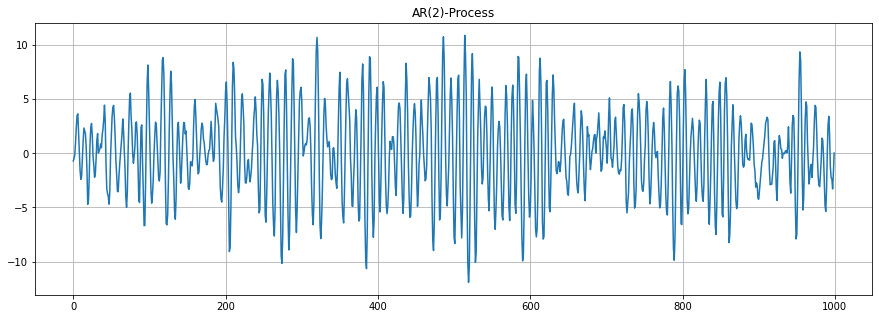

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

ar2 = [1, -1.5, 0.9]
model = ArmaProcess(ar = ar2, ma = None)
simulated_data = model.generate_sample(nsample=1000)

plt.figure(figsize = (15,5))
plt.plot(simulated_data, '-')
plt.grid()
plt.title("AR(2)-Process")
plt.show()

The characteristic polynomial is given by 
$$
\Phi(z) = 1 - a_1 z - a_2 z^2 - \dots - a_p z^p
$$
If all roots of $\Phi(z)$ have an absolute value larger than $1$, then the process is stationary. This can easily be checked with the following command. 

In [6]:
model.isstationary

True

We can even compute the complex roots of the polynomial, which are according to the lecture
$$
z_{1,2} = \frac{5}{6} \pm \frac{i}{2}\sqrt{\frac{5}{3}}
$$

In [7]:
model.arroots
print(np.abs(model.arroots))

[1.05409255 1.05409255]


Additionally, we compute the autocorrelation and partial autocorrelation both of the generated data (empirical acf/pacf) and for the process (theoretical). As we expect, the acf is oscillating and the pacf is vanishing after lags larger than $p$. 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


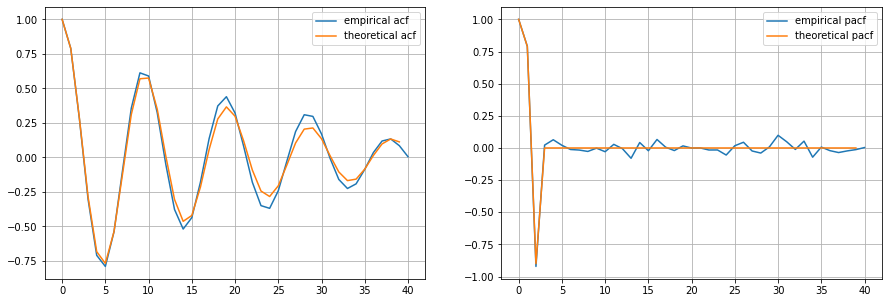

In [8]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(acf(simulated_data, nlags=40), label = "empirical acf")
ax[0].plot(model.acf(lags=40), label = "theoretical acf")
ax[0].legend()
ax[0].grid()

ax[1].plot(pacf(simulated_data, nlags=40), label = "empirical pacf")
ax[1].plot(model.pacf(lags=40), label = "theoretical pacf")
ax[1].legend()
ax[1].grid()